Initial Shape: (9, 10)
                        title      company  \
0                Data Analyst          NNC   
1                Data Analyst  Watu Credit   
2  Data Analyst (Credit Risk)         Kuda   
3                Data Analyst      Axonify   
4                Data Analyst   B3 Systems   

                                         description onsite_remote  salary  \
0  We are looking for a passionate certified Data...        onsite     NaN   
1  WATU is a focus-driven, customer-centric compa...        onsite     NaN   
2  Kuda is a fintech on a mission to make financi...        onsite     NaN   
3  Axonify is an intelligent workforce enablement...        onsite     NaN   
4  The ideal candidate will use their passion for...        onsite     NaN   

                                location  \
0                    Cairo, Cairo, Egypt   
1                  Nairobi County, Kenya   
2  Cape Town, Western Cape, South Africa   
3              Waterloo, Ontario, Canada   
4          

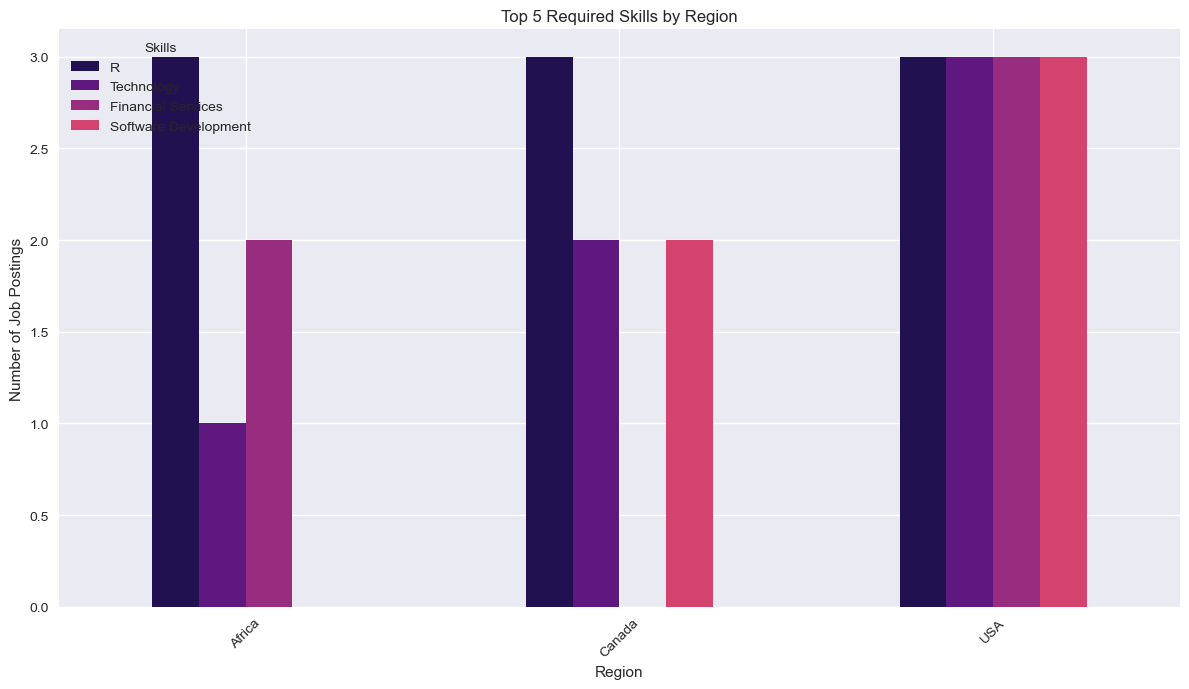

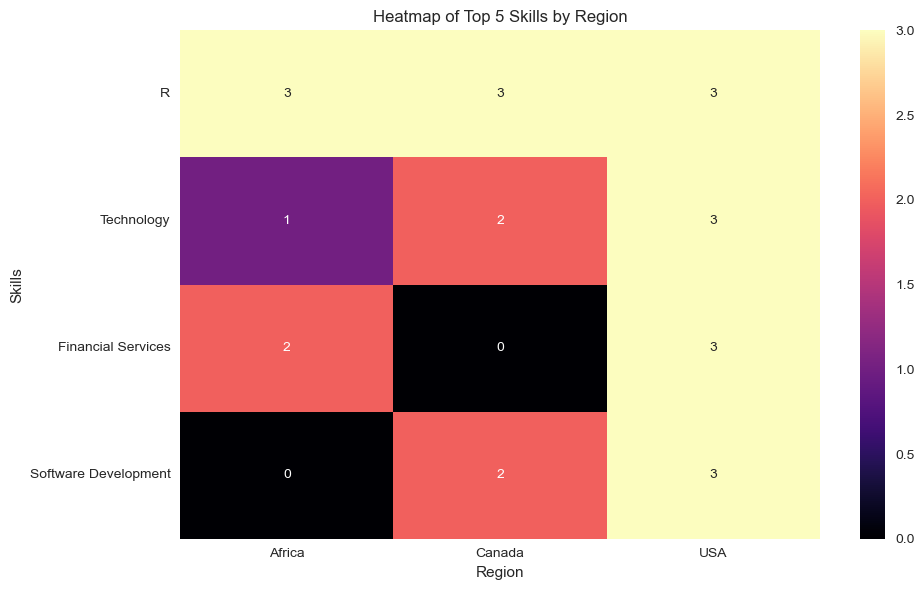

In [6]:
# ===============================
# end_to_end_project_viz.ipynb
# ===============================

# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np

# For better visualization
plt.style.use("seaborn-v0_8")
sns.set_palette("magma")

# ===============================
# 2. Load Data
# ===============================

# Raw data from the three CSV files
data_africa = """title,company,description,onsite_remote,salary,location,criteria,posted_date,link
Data Analyst,NNC,"We are looking for a passionate certified Data Analyst...",onsite,NaN,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'غیر مطبق'}, {'نوع التوظيف': 'دوام كامل'}, {'المهام الوظیفیة': 'محلل'}, {'المجالات': 'التكنولوجيا والمعلومات والإنترنت'}]",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst-at-nnc-3367161967
Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric company that believes everyone deserves the opportunity to be an entrepreneur and achieve their ambitious goals in life...",onsite,NaN,"Nairobi County, Kenya","[{'Seniority level': 'Associate'}, {'Employment type': 'Full-time'}, {'Job function': 'Analyst'}, {'Industries': 'Financial Services'}]",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst-at-watu-credit-3332732366
Data Analyst (Credit Risk),Kuda,"Kuda is a fintech on a mission to make financial services accessible, affordable and rewarding for every African on the planet...",onsite,NaN,"Cape Town, Western Cape, South Africa","[{'Seniority level': 'Not Applicable'}, {'Employment type': 'Full-time'}, {'Job function': 'Analyst'}, {'Industries': 'Technology, Information and Internet'}]",2022-11-21,https://za.linkedin.com/jobs/view/data-analyst-credit-risk-at-kuda-3369751844
"""

data_canada = """title,company,description,onsite_remote,salary,location,criteria,posted_date,link
Data Analyst,Axonify,"Axonify is an intelligent workforce enablement solution that supports 3.5M frontline workers...",onsite,NaN,"Waterloo, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Software Development'}]",2022-10-24,https://ca.linkedin.com/jobs/view/data-analyst-at-axonify-3324670516
Data Analyst,B3 Systems,"The ideal candidate will use their passion for big data and analytics to provide insights to the business covering a range of topics...",onsite,NaN,"Toronto, Ontario, Canada",[{'Employment type': 'Full-time'}],2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst-at-b3-systems-3361794123
Data Analyst,Wood Mackenzie,"Company DescriptionWood Mackenzie is the global leader in data, analysis and consulting across the energy, chemicals, metals, mining, power and renewables sectors...",onsite,NaN,"Calgary, Alberta, Canada","[{'Seniority level': 'Associate'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Software Development'}]",2022-11-16,https://ca.linkedin.com/jobs/view/data-analyst-at-wood-mackenzie-3356875084
"""

data_usa = """title,company,description,onsite_remote,salary,location,criteria,posted_date,link
Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that every person has the right to participate fully in the global economy...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Software Development, Technology, Information and Internet, and Financial Services'}]",2022-11-22,https://www.linkedin.com/jobs/view/data-analyst-recent-graduate-at-paypal-3364471019
Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that every person has the right to participate fully in the global economy...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Software Development, Technology, Information and Internet, and Financial Services'}]",2022-11-22,https://www.linkedin.com/jobs/view/data-analyst-recent-graduate-at-paypal-3364467390
Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that every person has the right to participate fully in the global economy...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Software Development, Technology, Information and Internet, and Financial Services'}]",2022-11-22,https://www.linkedin.com/jobs/view/data-analyst-at-paypal-3351980313
"""

# Load the datasets from strings
df_africa = pd.read_csv(io.StringIO(data_africa))
df_canada = pd.read_csv(io.StringIO(data_canada))
df_usa = pd.read_csv(io.StringIO(data_usa))

# Combine all data into a single dataframe
df = pd.concat([df_africa, df_canada, df_usa], ignore_index=True)

# Add a 'region' column
df['region'] = ['Africa'] * len(df_africa) + ['Canada'] * len(df_canada) + ['USA'] * len(df_usa)


print("Initial Shape:", df.shape)
print(df.head())

# ===============================
# 3. Extract Skills
# ===============================
# Keywords list
keywords = [
    'SQL', 'Python', 'R', 'Tableau', 'Power BI', 'Excel',
    'Technology', 'Software Development', 'Financial Services',
    'Data Analysis', 'Machine Learning'
]

def extract_skills(row):
    text = str(row.get("description", "")) + " " + str(row.get("criteria", ""))
    skills = []
    for k in keywords:
        if k.lower() in text.lower():
            skills.append(k)
    return skills

df["required_skills"] = df.apply(extract_skills, axis=1)

# ===============================
# 4. Preprocessing
# ===============================
# Drop duplicates
# df = df.drop_duplicates()

# Drop rows with no skills or location
df = df[df["required_skills"].map(len) > 0]
df = df.dropna(subset=["region"])

# Reset index
df = df.reset_index(drop=True)

print("After cleaning:", df.shape)

# ===============================
# 5. Explode Skills
# ===============================
df_exploded = df.explode("required_skills")

# Clean skills (lowercase & strip)
df_exploded["required_skills"] = df_exploded["required_skills"].str.strip()

print("After explode:", df_exploded.shape)
print(df_exploded.head())

# ===============================
# 6. Count Skills by Region
# ===============================
skills_by_region_counts = (
    df_exploded.groupby(["required_skills", "region"])
    .size()
    .unstack(fill_value=0)
)

print("Skills by region counts:")
print(skills_by_region_counts.head())

# ===============================
# 7. Top 5 Skills
# ===============================
top_skills = (
    skills_by_region_counts.sum(axis=1)
    .sort_values(ascending=False)
    .head(5)
    .index
)

print("Top Skills:", top_skills.tolist())

skills_to_plot = skills_by_region_counts.loc[top_skills].astype(int)

print("Skills to plot:")
print(skills_to_plot)

# ===============================
# 8. Visualization
# ===============================

# Bar Chart
skills_to_plot.T.plot(kind="bar", figsize=(12, 7))
plt.title("Top 5 Required Skills by Region")
plt.xlabel("Region")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.legend(title="Skills")
plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(skills_to_plot, annot=True, fmt="d", cmap="magma")
plt.title("Heatmap of Top 5 Skills by Region")
plt.ylabel("Skills")
plt.xlabel("Region")
plt.tight_layout()
plt.show()